# Import Data and Packages

In [ ]:
# https://drive.google.com/file/d/1PZ7aDjqV6pzZ4RG4EQhMy8vtkY-ifsXf/view?usp=sharing
!gdown --id '1PZ7aDjqV6pzZ4RG4EQhMy8vtkY-ifsXf'

# https://drive.google.com/file/d/1HHp7Z9KQKUPQupzsRZk84w8gM--Tb6zG/view?usp=sharing
!gdown --id '1HHp7Z9KQKUPQupzsRZk84w8gM--Tb6zG'

# https://drive.google.com/file/d/1xc3c99C6x67eEqopSmrUR-cHo5FbOgds/view?usp=sharing
!gdown --id '1xc3c99C6x67eEqopSmrUR-cHo5FbOgds'

# https://drive.google.com/file/d/1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-/view?usp=sharing
!gdown --id '1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-'  # 加Description分數

Downloading...
From: https://drive.google.com/uc?id=1PZ7aDjqV6pzZ4RG4EQhMy8vtkY-ifsXf
To: /content/listings_summary.csv
100% 73.5M/73.5M [00:00<00:00, 177MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HHp7Z9KQKUPQupzsRZk84w8gM--Tb6zG
To: /content/listings.csv
100% 3.88M/3.88M [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xc3c99C6x67eEqopSmrUR-cHo5FbOgds
To: /content/listings_sum_1203.csv
100% 72.6M/72.6M [00:00<00:00, 175MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-
To: /content/listings_summary_des.csv
100% 32.5M/32.5M [00:00<00:00, 152MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('listings_summary.csv', index_col=0, parse_dates=['host_since', 'first_review', 'last_review'])
print(df.shape)
df.head(1)

(22552, 95)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


# Preprocessing & EDA

## 刪除欄位

In [ ]:
# 刪掉一些文字變數/不知道用途的變數/應該無法預測的數
drop_col = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
            'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access',
            'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
            'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_acceptance_rate',
            'host_thumbnail_url', 'host_picture_url', 'street', 'city', 'state', 'market', 'smart_location', 'country_code', 'country',
            'weekly_price', 'monthly_price', 'calendar_last_scraped', 'license', 'jurisdiction_names', 'first_review', 'last_review']  # >99%都一樣，不一樣的也不太曉得區別
df.drop(drop_col, axis=1, inplace=True)
print(df.shape)
df.head()

(22552, 55)


,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,2008-08-18,within an hour,96%,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Mitte,Brunnenstr. Süd,Mitte,10119,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,118,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,4,3.76
2695,2008-09-16,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Prenzlauer Berg Nordwest,Pankow,10437,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,flexible,f,f,1,1.42
3176,2008-10-19,within a day,100%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,10405,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,143,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,1,1.25
3309,2008-11-07,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,10777,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,25,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,0.39
7071,2009-05-16,within an hour,100%,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Prenzlauer Berg,Helmholtzplatz,Pankow,10437,52.543157,13.415091,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,1,$24.00,2,10,3 days ago,t,15,26,26,26,197,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,1,1.75


## 變數轉換

### Data Type Transformation
1. 金額、百分比轉換
2. 日期變數轉換：轉成距離資料搜集日(2018/11/7)幾天
3. 期間變數轉換：calendar_updated由文字轉為日期
4. True/False：轉成1/0


In [ ]:
# Data Type Transform
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float) / 100.0  # 轉成數值轉成數值
df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df['price'] = df['price'].str.lstrip('$').str.replace(',', '').astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.lstrip('$').str.replace(',', '').astype(float)
df['extra_people'] = df['extra_people'].str.lstrip('$').str.replace(',', '').astype(float)
print(df.shape)

(22552, 55)


In [ ]:
# 日期變數轉換
df['host_since'] = (pd.Timestamp(2018, 11, 7) - df['host_since']).dt.days

In [ ]:
# 期間變數轉換
def convert_to_days(string):
  if string == 'today':
    return 0
  if string == 'yesterday':
    return 1
  if string == 'never':
    return 9999
  if string == 'a week ago':
    return 7
  if 'days' in string:
    return int(string[:2])
  if 'week' in string:
    return int(string[:2]) * 7
  if 'months' in string:
    return int(string[:2]) * 30

df['calendar_updated'] = df['calendar_updated'].apply(convert_to_days)

In [ ]:
# t/f 類別變數轉換
tf_col = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability',
          'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
for col in tf_col:
  df[col] = np.where(df[col] == 't', 1, 0)

### 類別變數轉換

In [ ]:
# 類別變數轉換
'''
1. 有缺值: neighbourhood, host_response_time, 
2. 沒有缺值、要刪欄位: host_neighbourhood, neighbourhood_cleansed, property_type, bed_type
3. 沒有缺值、不用刪欄位: neighbourhood_group_cleansed, room_type, cancellation_policy
4. 特殊: calendar_updated
'''
def get_dummy(dummy_df, colname, dummy_na, drop_first):
  dummy_df = pd.get_dummies(df[colname], dummy_na=dummy_na, drop_first=drop_first, prefix=colname)
  for col in dummy_df.columns:
    if dummy_df[col].sum() < df.shape[0] * 0.01:  # 去除掉比例低的項目
      dummy_df.drop([col], axis=1, inplace=True)
  new_df = pd.concat([df, dummy_df], axis=1)
  new_df.drop([colname], axis=1, inplace=True)
  return new_df

df = get_dummy(df, 'neighbourhood', dummy_na=True, drop_first=False)
df = get_dummy(df, 'host_response_time', dummy_na=False, drop_first=False)
df = get_dummy(df, 'host_neighbourhood', dummy_na=False, drop_first=False)
df = get_dummy(df, 'neighbourhood_cleansed', dummy_na=False, drop_first=False)
df = get_dummy(df, 'property_type', dummy_na=False, drop_first=False)
df = get_dummy(df, 'bed_type', dummy_na=False, drop_first=False)
df = get_dummy(df, 'neighbourhood_group_cleansed', dummy_na=False, drop_first=True)
df = get_dummy(df, 'room_type', dummy_na=False, drop_first=True)
df = get_dummy(df, 'cancellation_policy', dummy_na=False, drop_first=True)
df['zipcode'] = df['zipcode'].str[:4]
df = get_dummy(df, 'zipcode', dummy_na=True, drop_first=False)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# host_verifications轉換成Dummies
host_verifications_list = df['host_verifications'].replace("[\[' \]]", '', regex=True).str.split(',').tolist()
te = TransactionEncoder()
te_array = te.fit(host_verifications_list).transform(host_verifications_list).astype(int)
te_columns = ['host_verifications_{}'.format(col) for col in te.columns_]
host_verifications = pd.DataFrame(te_array, columns=te_columns, index=df.index)
host_verifications['host_verifications_way_num'] = host_verifications.sum(axis=1)

# amenities轉換成Dummies
amenities_list = df['amenities'].replace('[\{" \}]', '', regex=True).str.split(',').tolist()
te = TransactionEncoder()
te_array = te.fit(amenities_list).transform(amenities_list).astype(int)
te_columns = ['amenities_{}'.format(col) for col in te.columns_]
amenities = pd.DataFrame(te_array, columns=te_columns, index=df.index)
amenities['amenities_way_num'] = amenities.sum(axis=1)

In [ ]:
for col in host_verifications.columns:
  if host_verifications[col].sum() < host_verifications.shape[0] * 0.01:  # 去除掉比例低的項目
    host_verifications.drop([col], axis=1, inplace=True)

for col in amenities.columns:
  if amenities[col].sum() < amenities.shape[0] * 0.01:  # 去除掉比例低的項目
    amenities.drop([col], axis=1, inplace=True)

df = pd.concat([df, host_verifications], axis=1)
df = pd.concat([df, amenities], axis=1)
df.drop(['host_verifications', 'amenities'], axis=1, inplace=True)

In [ ]:
print(df.shape)
df.head()  # 2018-11-07

(22552, 249)


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_Charlottenburg,neighbourhood_Friedrichshain,neighbourhood_Kreuzberg,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_Neukölln,neighbourhood_Pankow,neighbourhood_Prenzlauer Berg,neighbourhood_Rummelsburg,neighbourhood_Schöneberg,neighbourhood_Tempelhof,neighbourhood_Wedding,neighbourhood_Wilmersdorf,neighbourhood_nan,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Charlottenburg,host_neighbourhood_Friedrichshain,host_neighbourhood_Kreuzberg,host_neighbourhood_Mitte,host_neighbourhood_Moabit,host_neighbourhood_Neukölln,host_neighbourhood_Pankow,host_neighbourhood_Prenzlauer Berg,host_neighbourhood_Schöneberg,host_neighbourhood_Wedding,host_neighbourhood_Wilmersdorf,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Rixdorf,neighbourhood_cleansed_Schillerpromenade,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Schöneberg-Süd,neighbourhood_cleansed_Südliche Friedrichstadt,neighbourhood_cleansed_Tempelhof,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_Wedding Zentrum,neighbourhood_cleansed_nördliche Luisenstadt,neighbourhood_cleansed_südliche Luisenstadt,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,zipcode_1011,zipcode_1017,zipcode_1024,zipcode_1031,zipcode_1040,zipcode_1043,zipcode_1055,zipcode_1058,zipcode_1062,zipcode_1071,zipcode_1077,zipcode_1078,zipcode_1082,zipcode_1096,zipcode_1099,zipcode_1204,zipcode_1205,zipcode_1243,zipcode_1318,zipcode_1334,zipcode_1335,zipcode_1405,zipcode_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_v

### 缺失值處理

In [ ]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False).to_frame(name='Number of NA')

,Number of NA
square_feet,22106
host_response_rate,12895
security_deposit,9361
cleaning_fee,7146
review_scores_value,4435
review_scores_checkin,4432
review_scores_location,4431
review_scores_communication,4418
review_scores_accuracy,4414
review_scores_cleanliness,4411


In [ ]:
# 刪除欄位
df.drop(['square_feet'], axis=1, inplace=True)  # 缺太多

# 刪除資料
# 1. 有numbers_of_reviews但沒有相關分數(review_scores)
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in review_columns:
  df = df[(df[col].notnull()) | (df['number_of_reviews'] == 0)]

# 2. 沒有host的資料
df = df[df['host_listings_count'].notnull()]

In [ ]:
fill_values = {'host_response_rate': 0, 'security_deposit': 0, 'cleaning_fee': 0, 'reviews_per_month': 0}
df.fillna(value=fill_values, inplace=True)

fill_columns = ['beds', 'bathrooms', 'bedrooms']
for col in fill_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# review分數補平均
fill_columns = ['review_scores_rating', 'review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']
for col in fill_columns:
  df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False).to_frame(name='Number of NA')

,Number of NA


In [ ]:
y = df['price']
x = df.drop(['price'], axis=1)

In [ ]:
print(df.shape)
df.head()

(21968, 248)


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_Charlottenburg,neighbourhood_Friedrichshain,neighbourhood_Kreuzberg,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_Neukölln,neighbourhood_Pankow,neighbourhood_Prenzlauer Berg,neighbourhood_Rummelsburg,neighbourhood_Schöneberg,neighbourhood_Tempelhof,neighbourhood_Wedding,neighbourhood_Wilmersdorf,neighbourhood_nan,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Charlottenburg,host_neighbourhood_Friedrichshain,host_neighbourhood_Kreuzberg,host_neighbourhood_Mitte,host_neighbourhood_Moabit,host_neighbourhood_Neukölln,host_neighbourhood_Pankow,host_neighbourhood_Prenzlauer Berg,host_neighbourhood_Schöneberg,host_neighbourhood_Wedding,host_neighbourhood_Wilmersdorf,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Rixdorf,neighbourhood_cleansed_Schillerpromenade,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Schöneberg-Süd,neighbourhood_cleansed_Südliche Friedrichstadt,neighbourhood_cleansed_Tempelhof,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_Wedding Zentrum,neighbourhood_cleansed_nördliche Luisenstadt,neighbourhood_cleansed_südliche Luisenstadt,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,zipcode_1011,zipcode_1017,zipcode_1024,zipcode_1031,zipcode_1040,zipcode_1043,zipcode_1055,zipcode_1058,zipcode_1062,zipcode_1071,zipcode_1077,zipcode_1078,zipcode_1082,zipcode_1096,zipcode_1099,zipcode_1204,zipcode_1205,zipcode_1243,zipcode_1318,zipcode_1334,zipcode_1335,zipcode_1405,zipcode_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications

## 加上敘述資料

In [ ]:
df = pd.read_csv('listings_summary_des.csv', index_col=0)
df.drop(['description'], axis=True, inplace=True)
df.fillna(0, inplace=True)
print(df.shape)
df.head(1)

(21968, 257)


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_Charlottenburg,neighbourhood_Friedrichshain,neighbourhood_Kreuzberg,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_Neukölln,neighbourhood_Pankow,neighbourhood_Prenzlauer Berg,neighbourhood_Rummelsburg,neighbourhood_Schöneberg,neighbourhood_Tempelhof,neighbourhood_Wedding,neighbourhood_Wilmersdorf,neighbourhood_nan,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Charlottenburg,host_neighbourhood_Friedrichshain,host_neighbourhood_Kreuzberg,host_neighbourhood_Mitte,host_neighbourhood_Moabit,host_neighbourhood_Neukölln,host_neighbourhood_Pankow,host_neighbourhood_Prenzlauer Berg,host_neighbourhood_Schöneberg,host_neighbourhood_Wedding,host_neighbourhood_Wilmersdorf,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Rixdorf,neighbourhood_cleansed_Schillerpromenade,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Schöneberg-Süd,neighbourhood_cleansed_Südliche Friedrichstadt,neighbourhood_cleansed_Tempelhof,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_Wedding Zentrum,neighbourhood_cleansed_nördliche Luisenstadt,neighbourhood_cleansed_südliche Luisenstadt,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,zipcode_1011,zipcode_1017,zipcode_1024,zipcode_1031,zipcode_1040,zipcode_1043,zipcode_1055,zipcode_1058,zipcode_1062,zipcode_1071,zipcode_1077,zipcode_1078,zipcode_1082,zipcode_1096,zipcode_1099,zipcode_1204,zipcode_1205,zipcode_1243,zipcode_1318,zipcode_1334,zipcode_1335,zipcode_1405,zipcode_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications

In [ ]:
y = df['price']
x = df.drop(['price'], axis=1)

In [ ]:
df.to_csv("df.csv", index = False)

# Training

## Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

# 70% train, 10% valid, 10% test, 10% stacking
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train_std = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_valid_std = pd.DataFrame(scaler.transform(x_valid), index=x_valid.index, columns=x_valid.columns)
x_test_std = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)
x_stack_std = pd.DataFrame(scaler.transform(x_stack), index=x_stack.index, columns=x_stack.columns)

## Model Evaluation

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

lr = LinearRegression(positive=True).fit(x_train, y_train)
y_valid_pred = lr.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[220.12387973 135.45752921   4.6984023  ...  42.89769183  48.23326655
  48.89323339]
MAE 46.0877 %


模型表現非常差，且預測結果有部分為負值，因此可轉換y，使模型不會預測出負數的結果

In [ ]:
y_train_log = np.log(y_train[y_train > 0])

In [ ]:
lr_log = LinearRegression().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lr_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 70.69866746 127.04619703  25.87654269 ...  36.32890492  40.5791398
  37.99944693]
MAE 25.9518 %


### Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

cnn = Sequential([Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(16), Dense(1)])
cnn.compile(loss='mean_absolute_error', optimizer='adam')
cnn.fit(x_train_std, y_train, epochs=100, batch_size=256, verbose=1)
y_train_pred = cnn.predict(x_train_std, verbose=1)
y_valid_pred = cnn.predict(x_valid_std, verbose=1)
print(mae(y_train, y_train_pred))
print(mae(y_valid, y_valid_pred))

Epoch 1/100
61/61 [==============================] - 1s 4ms/step - loss: 60.7830
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 29.3835
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 26.9061
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 26.7040
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 26.5383
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 26.4997
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 26.5878
Epoch 8/100
61/61 [==============================] - 0s 4ms/step - loss: 26.5959
Epoch 9/100
61/61 [==============================] - 0s 4ms/step - loss: 26.4736
Epoch 10/100
61/61 [==============================] - 0s 4ms/step - loss: 26.4138
Epoch 11/100
61/61 [==============================] - 0s 3ms/step - loss: 26.4497
Epoch 12/100
61/61 [==============================] - 0s 4ms/step - loss: 26.3895
Epoch 13/100
61/61 [=====

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(positive=True).fit(x_train, y_train)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[153.33328996 153.37208252  25.50841072 ...  56.91920655  49.00784673
  37.38467457]
MAE 39.7255 %


In [ ]:
lasso_log = Lasso().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lasso_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[39.72265854 54.45656711 38.77269033 ... 44.37276729 47.46506669
 43.48359329]
MAE 32.8400 %


### Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(positive=True).fit(x_train, y_train)
y_valid_pred = ridge.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[56.74453985 67.0366123  56.7430196  ... 61.67212645 66.64586209
 70.84593498]
MAE 39.7496 %


In [ ]:
from sklearn.linear_model import Ridge

ridge_log = Ridge().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(ridge_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 70.73162524 127.06225194  25.84129462 ...  36.38475439  40.6150373
  37.97991809]
MAE 25.9520 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(x_train, y_train)
y_valid_pred = rf.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 62.31 127.83  27.75 ...  47.75  47.9   38.67]
MAE 21.9572 %


In [ ]:
rf_log = RandomForestRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 65.75527998 121.70358496  28.09557218 ...  41.65859538  44.83027547
  33.74883688]
MAE 18.4290 %


In [ ]:
y_train[y_train == 0]

id
20317884    0.0
20671210    0.0
18612697    0.0
21154484    0.0
20448073    0.0
20218037    0.0
Name: price, dtype: float64

### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor().fit(x_train, y_train)
y_valid_pred = gb.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 72.70951605 146.03240116  32.65455766 ...  46.9006231   47.96305916
  35.65923134]
MAE 21.4785 %


In [ ]:
gb_log = GradientBoostingRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(gb_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[ 62.3770126  119.49317961  29.25352686 ...  47.58828991  47.92366281
  34.48805838]
MAE 20.8619 %


### XGBoost

In [ ]:
import xgboost as xgb

xg = xgb.XGBRegressor(eval_metric='mae').fit(x_train, y_train)
y_valid_pred = xg.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[09:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 70.362915 148.81389   33.766125 ...  48.704884  45.740856  34.226665]
MAE 20.9810 %


In [ ]:
xg_log = xgb.XGBRegressor(eval_metric='mae').fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(xg_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f} %'.format(mae(y_valid, y_valid_pred)))

[09:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 59.942924 116.973915  28.970476 ...  48.66079   47.492943  34.50936 ]
MAE 20.9308 %


# Stacking

## Training Again with Training and Validation Data

In [ ]:
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])
y_train_valid_log = np.log(y_train_valid[y_train_valid > 0])

id
19756336    4.605170
20839406    3.218876
15991056    3.637586
7925468     3.912023
4463980     4.077537
              ...   
10348393    3.761200
2643579     3.401197
27799797    3.871201
25477258    3.912023
18298685    3.401197
Name: price, Length: 17568, dtype: float64

In [ ]:
x_train_valid.loc[y_train_valid[y_train_valid > 0].index]

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_Charlottenburg,neighbourhood_Friedrichshain,neighbourhood_Kreuzberg,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_Neukölln,neighbourhood_Pankow,neighbourhood_Prenzlauer Berg,neighbourhood_Rummelsburg,neighbourhood_Schöneberg,neighbourhood_Tempelhof,neighbourhood_Wedding,neighbourhood_Wilmersdorf,neighbourhood_nan,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Charlottenburg,host_neighbourhood_Friedrichshain,host_neighbourhood_Kreuzberg,host_neighbourhood_Mitte,host_neighbourhood_Moabit,host_neighbourhood_Neukölln,host_neighbourhood_Pankow,host_neighbourhood_Prenzlauer Berg,host_neighbourhood_Schöneberg,host_neighbourhood_Wedding,host_neighbourhood_Wilmersdorf,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Rixdorf,neighbourhood_cleansed_Schillerpromenade,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Schöneberg-Süd,neighbourhood_cleansed_Südliche Friedrichstadt,neighbourhood_cleansed_Tempelhof,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_Wedding Zentrum,neighbourhood_cleansed_nördliche Luisenstadt,neighbourhood_cleansed_südliche Luisenstadt,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,zipcode_1011,zipcode_1017,zipcode_1024,zipcode_1031,zipcode_1040,zipcode_1043,zipcode_1055,zipcode_1058,zipcode_1062,zipcode_1071,zipcode_1077,zipcode_1078,zipcode_1082,zipcode_1096,zipcode_1099,zipcode_1204,zipcode_1205,zipcode_1243,zipcode_1318,zipcode_1334,zipcode_1335,zipcode_1405,zipcode_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications_manua

In [ ]:
# 1. Linear Log
lr_log = LinearRegression().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 2. Lasso Log
lasso_log = Lasso().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 3. Ridge Log
ridge_log = Ridge().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 4. RandomForest Log
rf_log = RandomForestRegressor().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 5. Gradient Boosting Regressor
gb = GradientBoostingRegressor().fit(x_train_valid, y_train_valid)

# 6. XGBoost
xg = xgb.XGBRegressor(eval_metric='mae').fit(x_train_valid, y_train_valid)

[08:59:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Stacking

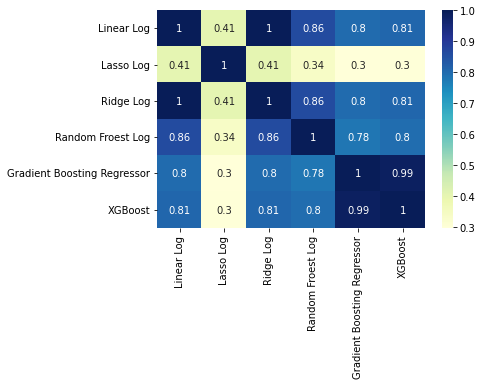

In [ ]:
# 觀察各模型的相似程度
x_stack_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_stack)),
    'Lasso Log': np.exp(lasso_log.predict(x_stack)),
    'Ridge Log': np.exp(ridge_log.predict(x_stack)),
    'Random Froest Log': np.exp(rf_log.predict(x_stack)),
    'Gradient Boosting Regressor': gb.predict(x_stack),
    'XGBoost': xg.predict(x_stack)
})
sns.heatmap(x_stack_df.corr(), annot=True, cmap='YlGnBu')

1. Linear和Ridge太相似，所以丟掉Ridge
2. Gradient Boosting Regressor和XGBoost太相似，所以丟掉XGBoost

In [ ]:
# 觀察各模型的相似程度
x_stack_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_stack)),
    'Lasso Log': np.exp(lasso_log.predict(x_stack)),
    'Random Froest Log': np.exp(rf_log.predict(x_stack)),
    'Gradient Boosting Regressor': gb.predict(x_stack)
})

In [ ]:
stack = LinearRegression().fit(x_stack_df, y_stack)
print(stack.coef_)

[0.28394376 0.03018266 0.46013125 0.49425252]


# Test Data

### 各種模型的模型的MAE

### Stack

In [ ]:
x_test_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_test)),
    'Lasso Log': np.exp(lasso_log.predict(x_test)),
    'Random Froest Log': np.exp(rf_log.predict(x_test)),
    'Gradient Boosting Regressor': gb.predict(x_test),
})
x_test_df

,Linear Log,Lasso Log,Random Froest Log,Gradient Boosting Regressor
0,18.144189,38.596922,23.633854,29.738159
1,26.720528,49.832895,29.294693,28.929018
2,74.842209,50.193306,86.883625,90.713079
3,24.934330,39.365162,32.270328,28.373897
4,62.425095,55.303326,58.887526,60.599680
...,...,...,...,...
2192,46.194003,40.253184,40.153748,53.859085
2193,47.404026,39.376763,39.010587,66.310844
2194,52.010857,45.572984,44.143361,47.277429
2195,50.622090,45.710954,61.540355,52.778903


In [ ]:
print('Linear MAE {:.4f} %'.format(mae(y_test, np.exp(lr_log.predict(x_test)))))
print('Lasso MAE {:.4f} %'.format(mae(y_test, np.exp(lasso_log.predict(x_test)))))
print('Ridge MAE {:.4f} %'.format(mae(y_test, np.exp(ridge_log.predict(x_test)))))
print('Random Forest MAE {:.4f} %'.format(mae(y_test, np.exp(rf_log.predict(x_test)))))
print('Gradient Boosting Regressor MAE {:.4f} %'.format(mae(y_test, gb.predict(x_test))))
print('XGBoost MAE {:.4f} %'.format(mae(y_test, xg.predict(x_test))))
print('Stack MAE {:.4f} %'.format(mae(y_test, stack.predict(x_test_df))))

Linear MAE 24.3284 %
Lasso MAE 32.9845 %
Ridge MAE 24.3203 %
Random Forest MAE 20.6743 %
Gradient Boosting Regressor MAE 23.4749 %
XGBoost MAE 23.6884 %
Stack MAE 22.4775 %
